# Livrable 1

## Table des matières
- [Introduction](#introduction)
1. [Contraintes](#1-contraintes)
1. [Modélisation](#2-modélisation)
1. [Implémentation](#3-implémentation)
1. [Exploitation](#4-exploitation)
- [Conclusion](#conclusion)

## Introduction

L'ADEME (Agence de l'Environnement et de la Maîtrise de l'Energie) a récemment lancé un appel à manifestation d'intérêt pour promouvoir la réalisation de démonstrations et d'expérimentations de nouvelles solutions de mobilité pour les personnes et les marchandises adaptées à différents types de territoires.<br><br>
Notre équipe fait partie de la structure CesiCDP déjà implantée dans le domaine et nous avons été mobilisé pour répondre à cet appel.
CesiCDP souhaite que l'on oriente l'étude sur la gestion de tournées de livraison. Le problème algorithmique consiste a calculer, sur un réseau routier quelconque, une tournée permettant de relier entre elles un sous-ensemble de villes avec pour but de revenir au point de départ en un minimum de temps.
Une méthode algorithme permettrant de répondre a ce problème est attendu.
Il est aussi demandé d'ajouter des contraintes supplémentaires afin de rendre le model plus réaliste possible.

## 1. Contraintes

Afin de répondre à l’appel d’offre de l’ADEME, nous avons donc dû identifier les contraintes de notre algorithme.

Notre solution doit :
- Réaliser un cycle permettant de passer par toutes les villes souhaitées,
- Prendre en compte le temps nécessaire pour le passage entre deux villes.

De plus, nous avons opté pour ajouter une contrainte supplémentaire :
- Le temps de parcours d’une arête varie au cours du temps.
Cette contrainte nous a paru pertinente car le temps nécessaire au transit n’est généralement pas le même en fonction de la densité de circulation qui varie en fonction du temps.

## 2. Définitions / Problèmes

Dans un premier temps, le probleme peut être reformulé sous la forme d'un graph complet composé de l'ensemble de sommets U. L'objectif final étant de relier tous les sommets de ce graph en revenant au point de départ sur la distance la plus courte possible. Cela correspond a l'appellation d'un cycle hamiltonien. Notre objectif est donc de modéliser le cycle hamiltonien ayant la plus courte distance totale en temps.

La recherche d'un cycle hamiltonien n'étant pas un probleme ayant une solution de réponse en respectant le temps polynomiale, la recherche du chemin le plus court dans notre cas est donc qualifié de complexité NP-complet. Cependant donc notre cas, comme nous souhaitons avoir le meilleur chemin possible, il est donc necessaire de tester toutes les solutions possible. Notre probleme devient donc un algorithme de type NP-Difficile.

Afin de résoudre la solution, nous devons avoir tous les chemins possibles. Cependant, le nombre de chemin disponible est égal a n! (N factoriel). La complexité de cette solution est donc de O(n!), cependant lors de recherches nous avons trouvé une solution permettant de transformer une compléxité O(n!) en O(e<sup>n</sup>).

Afin d'avoir un temps de resolution tout de même respectable, avec des machines posssédées par le communs des mortels, nous avons choisi la solution de faire un algorithme de type heuristique.



## 3. Modélisation


Pour ceci, nous devons prouver via un algorithme de certificat que la solution est vérifiable en temps polynomiale :
<br></br>

   Dans un premier temps, qu'est-ce qu'un temps polynomiale ?

Un temps polynomial peut être vu comme le temps minimum d’exécution d’un algorithme en fonction des données en
entrée. Un algorithme est résolu en temps polynomial si, pour toutes constantes c et n indépendantes, avec n un entier
présentant la taille des données en entrée, il s’exécute en moins de c.n<sup>k</sup> opérations élémentaires (et k est une constante indépendante des deux autres).

Par la suite, dans notre situation de voyageur de commerce et dans les contraintes demandées, notre solution doit être vérifiable dans un temps polynomiale sur un jeu de données de plusieurs milliers de points. Nous allons donc apporter la preuve :


In [49]:
import numpy as np

size = (10, 10)

adj_mat = np.random.randint(2, size=size)


Dans un premier temps, nous avons généré une matrice d'adjacence. Cette matrice est un échantillon de 10x10 afin d'avoir un temps de demonstration raisonnable.

Dans un second temps, l'objectif est d'afficher cette matrice sous forme de graph :

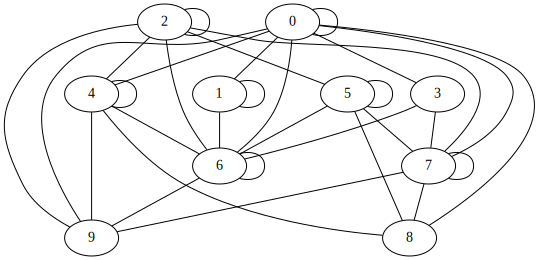

In [50]:
import networkx as nx
from IPython.display import SVG, display

graph = nx.from_numpy_array(adj_mat, parallel_edges=True, create_using=nx.MultiGraph)

agraph = nx.nx_agraph.to_agraph(graph)
tmp_path = "tmp_graph.svg"
agraph.draw(tmp_path, prog="dot")
display(SVG(tmp_path))


Ici, nous avons réussi la génération du graph, maintenant il nous faut l'algorithme permettant de resoudre ce probleme de manière simple :

In [51]:
path = nx.approximation.traveling_salesman_problem(graph,nodes=list(range(0, 9)), cycle=False)

print(path)

[7, 3, 6, 1, 0, 8, 5, 2, 4]


Ici, nous avons la solution la plus optimisé sans aucune contrainte pour la demonstration. Maintenant, nous allons executer un algorithme de certificat qui prouve que la solution est correcte :

In [52]:
 #Ici algo de certificat avec temps de vérification

In [ ]:
#Ici demontration de la reduction polynomiale

En cherchant et en ce concertant quand aux meilleurs solutions pour repondre à ce problème nous sommes tombé sur 3 algorithmes qui semblait repondre aux besoins du projet :

- K-Nearest Neighbors Algorithm
- Greedy Algorithms
- Tabu search



#### K-Nearest Neightbors Algorithm :

L'algorithme naïf de recherche de voisinage consiste à passer sur l'ensemble des n points de A et à regarder si ce point est plus proche ou non qu'un des plus proches voisins déjà sélectionné, et si oui, l'insérer. On obtient alors un temps de calcul linéaire en la taille de A : O(n) (tant que k << n). Cette méthode est appelée la recherche séquentielle ou recherche linéaire.

Le probleme est que la recherche linéaire souffre d'un problème de lenteur. Si l'ensemble A est grand, il est alors extrêmement coûteux de tester les n points de l'espace.


#### Greedy Algorithms :

#### Tabu search :

La recherche avec tabous est déterministe et a une notion de mémoire. Le choix du meilleur voisin d’une solution pousse l’algorithme à trouver les optima locaux ; et comme l’exploration de l’espace de recherche est effectué en limitant le voisinage de la solution en rendant « tabous » certains mouvements, l’algorithme doit théoriquement visiter l’optimum global.

## 5. Exploitation

## Conclusion